In [70]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

### Problem Definition
The given conditions can be seen as a **Convex Optimisation Problem** where the objective function is the weighted utilitarian criterion, with the payoff vectors as the problem variables and weight of player 1's utilitarian as the problem parameter.  

The feasible set *F* is defined as the set of payoff vectors {*u<sub>1</sub>,u<sub>2</sub>*} that follow the inequality constraints associated with the problem.

### Defining the variables
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**&theta;** ∈ [0,1]  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**d** = {3.5,2}  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**u** = {u1,u2}  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**&theta;**<sub>opt</sub> is the value of **&theta;** such that it minimises the objective function


In [71]:
theta_range = np.linspace(0,1,1000)
d = np.array([3.5,2])
u = cp.Variable(2)
opt = cp.Parameter()

### Defining the Inequality Constraints
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*f<sub>1</sub>(x): &nbsp;&nbsp; u<sub>1</sub> + 2u<sub>2</sub> <= 12*  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*f<sub>2</sub>(x): &nbsp;&nbsp; 2u<sub>1</sub> + u<sub>2</sub> <= 12*  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*f<sub>3</sub>(x): &nbsp;&nbsp; u<sub>1</sub> <= d<sub>1</sub>*  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*f<sub>4</sub>(x): &nbsp;&nbsp; u<sub>2</sub> <= d<sub>2</sub>*  

In [72]:
fi = [
    u[0]+2*u[1]<=12,
    2*u[0]+u[1]<=12,
    u[0]>=d[0],
    u[1]>=d[1]
]

### Defining the Objective Function

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*f<sub>0</sub>(x): &nbsp; &theta;u<sub>1</sub> + (1-&theta;)u<sub>2</sub> &nbsp;&nbsp;&nbsp; where &theta; ∈ [0,1]*  

The solution of the problem **&theta;**<sub>opt</sub> is defined as:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**&theta;**<sub>opt</sub> = argmin *<sub>u<sub>1</sub>,u<sub>2</sub></sub> f<sub>0</sub>(x)* &nbsp;&nbsp;&nbsp; such that (*u<sub>1</sub>,u<sub>2</sub>*) ∈ *F*  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; subject to *f<sub>i</sub>*(*x*) <= 0 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; *i = 1,2,...,m*

In [73]:
f0 = cp.Minimize(-1*(opt*u[0] + (1-opt)*u[1]))

For each *&theta;* ∈ [0,1], the value of *u<sub>1</sub>* is calculated at *&theta;* i.e. *u<sub>1</sub>*(*&theta;*) and plotted as a plot of *u<sub>1</sub>*(*&theta;*) vs *&theta;*  

In [74]:
y_arr = []
for theta in theta_range:
    opt.value = theta
    problem = cp.Problem(f0,fi)
    problem.solve()
    y_arr.append(u.value[0])

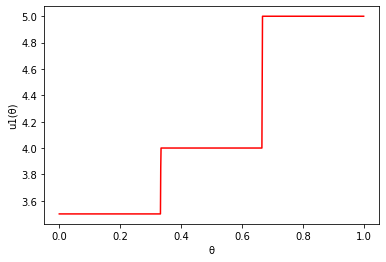

In [75]:
plt.plot(theta_range,y_arr,color='red')
plt.xlabel("θ")
plt.ylabel("u1(θ)")
plt.show()